<a href="https://colab.research.google.com/github/AdityaPatidaroo7/Aditya-/blob/main/Neurance_ai_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#loading the data
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [3]:
# Checking the features
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [4]:
df.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428
32164,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,8.205393


In [5]:
# Checking the information about data types, rangeindex and non-null.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [6]:
# check for missing values
df.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [7]:
# Checked the summary of the continuous data
df[['effectiveness_rating','number_of_times_prescribed','base_score']].describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


In [8]:
# Check for catagorical data
df[['name_of_drug','use_case_for_drug','review_by_patient']].describe()

,name_of_drug,use_case_for_drug,review_by_patient
count,32165,32165,32165
unique,2220,636,30121
top,Levonorgestrel,Birth Control,"""Good"""
freq,724,5795,8


In [9]:
# Checking the unique values of drugs names of top 10.
use_case_for_drug = df["name_of_drug"].value_counts().sort_values(ascending=False)
use_case_for_drug=pd.DataFrame(use_case_for_drug[:10]).reset_index()
use_case_for_drug

,index,name_of_drug
0,Levonorgestrel,724
1,Etonogestrel,628
2,Ethinyl estradiol / norethindrone,547
3,Ethinyl estradiol / norgestimate,425
4,Nexplanon,397
5,Ethinyl estradiol / levonorgestrel,394
6,Phentermine,296
7,Sertraline,281
8,Escitalopram,265
9,Mirena,241


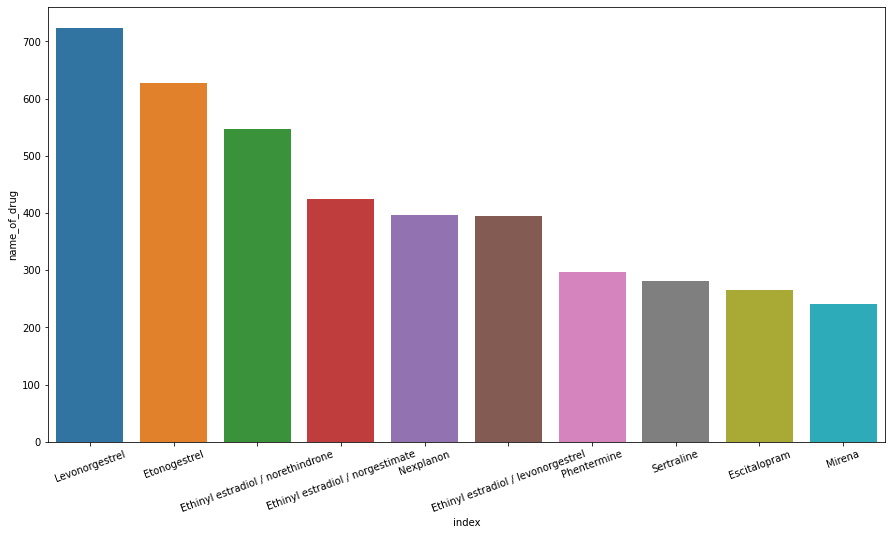

In [10]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.barplot(x='index', y='name_of_drug', data=use_case_for_drug)
plt.xticks(rotation=20)
plt.show()

In [11]:
# analysing top drug
drg_1 = df[df['name_of_drug']=='Levonorgestrel']
drg_1

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
79,130586,Levonorgestrel,Birth Control,"""I have had my Mirena for three months now. In...",10,1-May-12,2,8.074493
100,165993,Levonorgestrel,Emergency Contraception,"""I always read reviews as I am always paranoid...",10,6-Feb-17,9,8.656797
136,166235,Levonorgestrel,Birth Control,"""I had this inserted today. Due to extremely ...",9,17-Jan-17,2,8.174544
288,129725,Levonorgestrel,Birth Control,"""I was on Skyla for about 2 years and had an o...",6,29-May-15,13,1.632839
317,129147,Levonorgestrel,Emergency Contraception,"""I felt I needed to add one of these, it was t...",10,15-Oct-15,11,7.544493
...,...,...,...,...,...,...,...,...
31957,129627,Levonorgestrel,Emergency Contraception,"""So I had unprotected sex and then I realized ...",1,24-Jun-15,3,7.050087
32100,129470,Levonorgestrel,Emergency Contraception,"""Just thought I&#039;d share since it made me ...",10,16-Aug-15,2,8.074493
32107,129858,Levonorgestrel,Birth Control,"""I got the mirena 3 days ago and I&#039;ve had...",4,25-Apr-15,9,8.494570
32146,130934,Levonorgestrel,Birth Control,"""I had my Mirena in for a year and half and ju...",2,6-Jan-11,3,8.311305


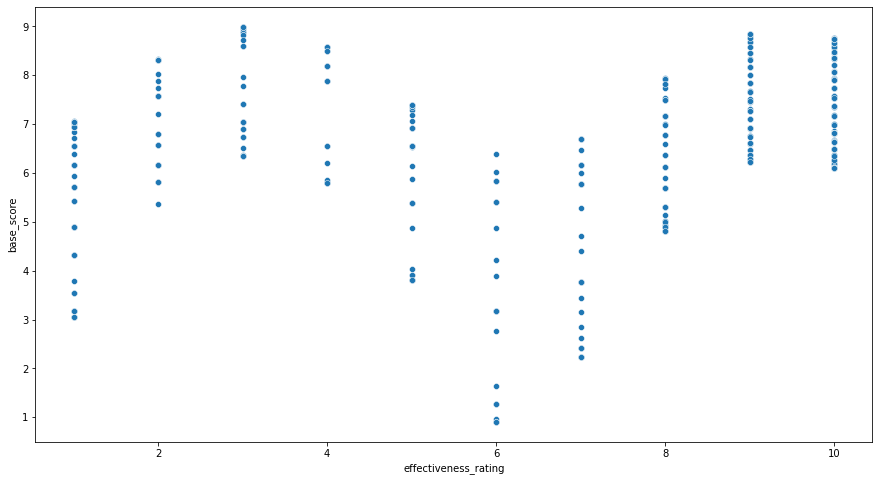

In [12]:
sns.scatterplot(x = "effectiveness_rating", y="base_score",data=drg_1)

In [13]:
 df['review_by_patient'][1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [14]:
a = df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug').agg('mean').reset_index()
a = a.sort_values(['effectiveness_rating', 'base_score'],ascending= False)
a

,name_of_drug,effectiveness_rating,base_score
268,Benzoic acid / salicylic acid,10.0,8.757201
408,Chaparral,10.0,8.757201
450,CitraNatal 90 DHA,10.0,8.757201
349,Calan,10.0,8.756849
2154,Xolegel,10.0,8.756849
...,...,...,...
1754,Romidepsin,1.0,3.054420
1982,Toujeo Solostar,1.0,3.054420
2029,Tums Smoothies,1.0,3.054420
2077,Vandazole,1.0,3.054420


In [15]:
a.value_counts()

name_of_drug                          effectiveness_rating  base_score
Abacavir / dolutegravir / lamivudine  8.857143              5.908076      1
Onfi                                  8.000000              6.358312      1
Omnaris                               8.000000              3.504191      1
Omnicef                               3.000000              6.838803      1
Omnitrope                             10.000000             8.745991      1
                                                                         ..
Ephedrine / guaifenesin               8.000000              7.893476      1
Epclusa                               7.818182              7.113168      1
Enzalutamide                          1.000000              7.050087      1
Entyvio                               3.500000              7.618344      1
ella                                  7.200000              6.427585      1
Length: 2220, dtype: int64

In [16]:
# Analysing the drug name and efective rating with groupby
b = pd.DataFrame(df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug')['effectiveness_rating'].apply(set)).reset_index()
b

,name_of_drug,effectiveness_rating
0,Abacavir / dolutegravir / lamivudine,"{10, 5, 7}"
1,Abatacept,{10}
2,Abilify,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}"
3,Abilify Discmelt,{8}
4,Abiraterone,{10}
...,...,...
2215,Zyprexa,"{1, 2, 3, 6, 7, 8, 9, 10}"
2216,Zyprexa Intramuscular,{8}
2217,Zyrtec,"{1, 3, 5, 7, 9, 10}"
2218,Zyvox,"{9, 10, 5}"


In [21]:
c = pd.DataFrame(df[['name_of_drug', 'effectiveness_rating', 'base_score']].groupby('name_of_drug')['effectiveness_rating'].apply(list)).reset_index()
c

,name_of_drug,effectiveness_rating
0,Abacavir / dolutegravir / lamivudine,"[10, 10, 7, 5, 10, 10, 10]"
1,Abatacept,[10]
2,Abilify,"[5, 7, 9, 5, 1, 10, 9, 8, 1, 9, 2, 5, 9, 10, 9..."
3,Abilify Discmelt,[8]
4,Abiraterone,[10]
...,...,...
2215,Zyprexa,"[2, 8, 3, 8, 1, 6, 10, 8, 10, 10, 10, 9, 10, 3..."
2216,Zyprexa Intramuscular,[8]
2217,Zyrtec,"[9, 10, 1, 10, 10, 9, 7, 10, 1, 7, 1, 10, 9, 3..."
2218,Zyvox,"[9, 9, 10, 5, 10, 10]"


In [25]:
from statistics import mean

In [26]:
b['unique_ratings'] = b['effectiveness_rating'].apply(lambda x: len(x))
b['lst_effectiveness_rating'] = c['effectiveness_rating']
b['unique_lst_ratings'] = c['effectiveness_rating'].apply(lambda x: len(x))
b['avg_lst_ratings'] = c['effectiveness_rating'].apply(lambda x: mean(x))
b

,name_of_drug,effectiveness_rating,unique_ratings,lst_effectiveness_rating,unique_lst_ratings,avg_lst_ratings
0,Abacavir / dolutegravir / lamivudine,"{10, 5, 7}",3,"[10, 10, 7, 5, 10, 10, 10]",7,8.857143
1,Abatacept,{10},1,[10],1,10.000000
2,Abilify,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,"[5, 7, 9, 5, 1, 10, 9, 8, 1, 9, 2, 5, 9, 10, 9...",77,6.259740
3,Abilify Discmelt,{8},1,[8],1,8.000000
4,Abiraterone,{10},1,[10],1,10.000000
...,...,...,...,...,...,...
2215,Zyprexa,"{1, 2, 3, 6, 7, 8, 9, 10}",8,"[2, 8, 3, 8, 1, 6, 10, 8, 10, 10, 10, 9, 10, 3...",28,6.892857
2216,Zyprexa Intramuscular,{8},1,[8],1,8.000000
2217,Zyrtec,"{1, 3, 5, 7, 9, 10}",6,"[9, 10, 1, 10, 10, 9, 7, 10, 1, 7, 1, 10, 9, 3...",16,6.937500
2218,Zyvox,"{9, 10, 5}",3,"[9, 9, 10, 5, 10, 10]",6,8.833333


In [20]:
b['unique_ratings'].value_counts()

1     808
2     355
3     234
4     184
5     146
10    134
6      95
7      91
9      88
8      85
Name: unique_ratings, dtype: int64

In [4]:
Data Preprocessing

SyntaxError: ignored